<a href="https://colab.research.google.com/github/ashishvz/EyeDiagnosis/blob/master/keras_eye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenetv2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, SGD
import keras
from tensorflow import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
#mobilenet=MobileNetV2()
mobilenet.summary()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_path='/content/drive/My Drive/test'

In [0]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224, 224),
                                                         class_mode='categorical', batch_size=20)

Found 968 images belonging to 4 classes.


In [0]:
def prepare_image(file):
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_expanded_dims)

mobilenet = MobileNetV2()

# x =  mobilenet.layers[-6].output
x =  mobilenet.layers[-2].output
predictions =  Dense(4, activation='softmax')(x)
from keras import Model
model = Model(inputs= mobilenet.input, outputs=predictions)

print(model.summary())

In [0]:
model.compile(SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [0]:
history = model.fit_generator(train_batches, steps_per_epoch=10, epochs=25, verbose=2, callbacks=[tensorboard])

In [0]:
!tensorboard --logdir=logs/

TensorBoard 1.13.1 at http://f23f3f1c0868:6006 (Press CTRL+C to quit)
^C


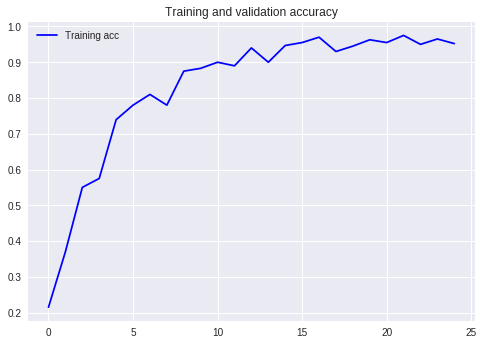

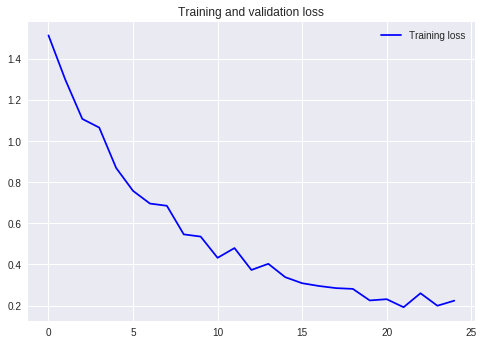

In [0]:
acc = history.history['acc']
loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('/content/drive/My Drive/eye_oct.h5')

In [0]:
ground_truth = train_batches.classes

# Get the label to class mapping from the generator
label2index = train_batches.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v, k) for k, v in label2index.items())

print(idx2label)

{0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}


In [0]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


img_path = '/content/drive/My Drive/dmd.jpg'  # dog

    # load a single image
new_image = load_image(img_path)

    # check prediction
pred = model.predict(new_image)
#classes = pred.class_indices
print(pred)